In [110]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [111]:
Batch_size = 2
Image_size = 256
Channels = 3
Epochs = 50


In [112]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle=True,
    image_size= (Image_size,Image_size)
)

Found 2190 files belonging to 2 classes.


In [68]:
class_name = dataset.class_names
class_name

['actinic keratosis', 'nevus']

(32, 256, 256, 3)
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


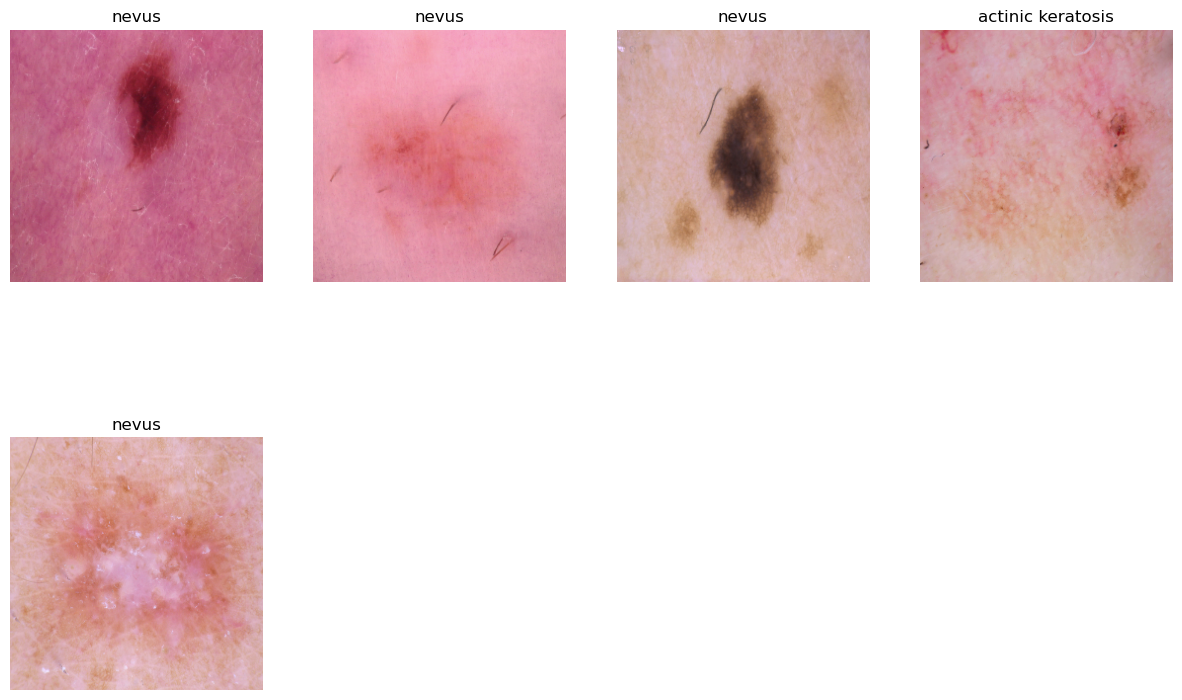

In [69]:
plt.figure(figsize=(15,15))
for image_batch , labels_batch in dataset.take(1):
    print (image_batch.shape)
    print(labels_batch.numpy())
    for i in range(5):
        ax = plt.subplot(3,4, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")


In [70]:
80% ==> training
10% ==> Validation
10% Test


SyntaxError: invalid syntax (824230328.py, line 1)

In [ ]:
train_size = 0.8
len(dataset)*.8

In [ ]:
train_ds = dataset.take(250)
len(train_ds)

In [71]:
test_ds = dataset.skip(250)
len(test_ds)

0

In [72]:
validation_size = 0.1
len(dataset)*validation_size

6.9

In [73]:
val_ds = test_ds.take(31)
len(val_ds)

0

In [74]:
test_ds = test_ds.take(31)
len(test_ds)

0

In [75]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_slip = 0.1, shuffle=True,shuffle_size = 10000):
    assert(train_split + val_split+test_slip) ==1
    ds_size = len(ds)
    if(shuffle):
        ds = ds.shuffle(shuffle_size, seed =12)
    
    train_size = int(train_split*ds_size)
    validation_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).take(validation_size)
    
    return train_ds, val_ds, test_ds

In [76]:
 train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [77]:
len(test_ds)

6

In [78]:
train_ds =train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [79]:
resize_and_resacele = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [80]:
data_augmentaion = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [81]:
Channels

3

In [82]:
input_shape = (Batch_size,Image_size,Image_size,Channels)
n_class = 2
model = models.Sequential([
    resize_and_resacele,
    data_augmentaion,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(n_class, activation= 'softmax')
])
model.build(input_shape=input_shape)

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (2, 256, 256, 3)          0         
                                                                 
 sequential_10 (Sequential)  (2, 256, 256, 3)          0         
                                                                 
 conv2d_18 (Conv2D)          (2, 254, 254, 32)         896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (2, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (2, 125, 125, 32)         9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (2, 62, 62, 32)          0         
 g2D)                                                

In [84]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  
)

In [85]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data= val_ds,
    verbose=1,
    epochs = 50
)

Epoch 1/50
55/55 [==============================] - 99s 2s/step - loss: 0.2239 - accuracy: 0.9495 - val_loss: 0.2188 - val_accuracy: 0.9427
Epoch 2/50
55/55 [==============================] - 79s 1s/step - loss: 0.1740 - accuracy: 0.9495 - val_loss: 0.1805 - val_accuracy: 0.9427
Epoch 3/50
55/55 [==============================] - 79s 1s/step - loss: 0.1631 - accuracy: 0.9495 - val_loss: 0.1639 - val_accuracy: 0.9427
Epoch 4/50
55/55 [==============================] - 78s 1s/step - loss: 0.1565 - accuracy: 0.9495 - val_loss: 0.2191 - val_accuracy: 0.9427
Epoch 5/50
55/55 [==============================] - 78s 1s/step - loss: 0.1613 - accuracy: 0.9495 - val_loss: 0.1595 - val_accuracy: 0.9427
Epoch 6/50
55/55 [==============================] - 79s 1s/step - loss: 0.1565 - accuracy: 0.9495 - val_loss: 0.1594 - val_accuracy: 0.9427
Epoch 7/50
55/55 [==============================] - 79s 1s/step - loss: 0.1499 - accuracy: 0.9495 - val_loss: 0.1482 - val_accuracy: 0.9427
Epoch 8/50
55/55 [==

In [86]:
model.evaluate(test_ds)

6/6 [==============================] - 13s 300ms/step - loss: 0.0982 - accuracy: 0.9688


[0.0981597825884819, 0.96875]

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

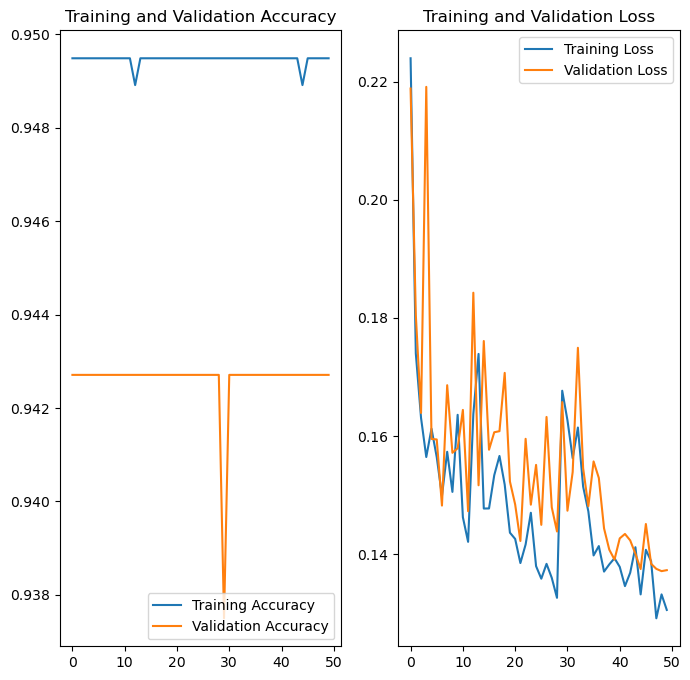

In [102]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image To Preddict
Label: 1
1/1 [==============================] - 0s 440ms/step
predicted label: nevus


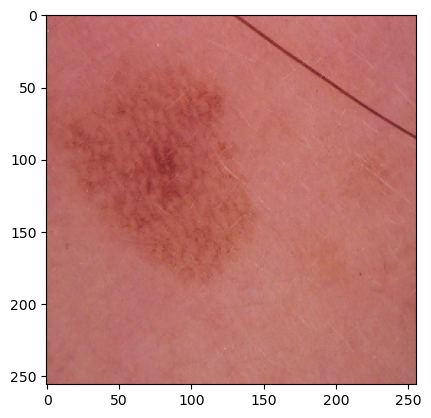

In [108]:
import numpy as np
for image_batch , labels_batch in dataset.take(1):
    imges = image_batch[1].numpy().astype("uint8")
    
    print("First Image To Preddict")
    
    plt.imshow(imges)
    print("Label:",labels_batch[0].numpy())
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[2])])
    
    

In [106]:
import os
model_vesion = max([int(i) for i in (os.listdir("../model")+[0])]) + 1
model.save(f"../model/{model_vesion}")

INFO:tensorflow:Assets written to: ../model/5\assets


INFO:tensorflow:Assets written to: ../model/5\assets
